In [11]:
%matplotlib inline
import numpy as np
from pylab import *

dt = 0.01
n_steps = 10000

# regular spiking
a = 0.02
b = 0.2
c = -55
d = 2


In [25]:
u = np.zeros((n_steps))
v = np.zeros((n_steps)) # membrane potential
v[0] = -65
I_in = 15*np.ones((n_steps))

In [26]:
for i in arange(n_steps-1):
    dvdt = 0.04*v[i]**2+5*v[i]+140-u[i]+I_in[i]
    dudt =a*(b*v[i]-u[i])
    
    if v[i]>=30:
        v[i+1]=c
        u[i+1]=u[i]+d
    else:
        v[i+1] = v[i]+dt*dvdt
        u[i+1] = u[i]+dt*dudt
    
    
    

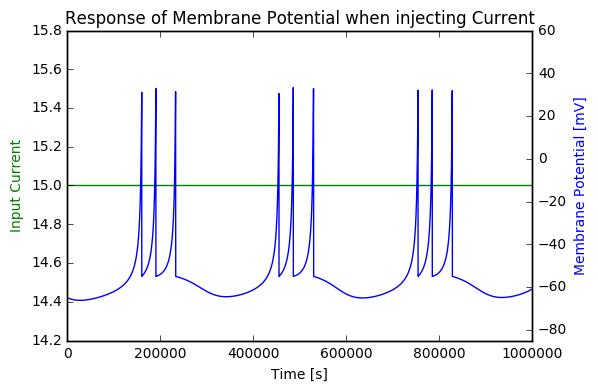

In [27]:
t = np.linspace(0,n_steps/dt,n_steps)

fig, ax1 = subplots()

ax2 = ax1.twinx()
ax1.plot(t, I_in, 'g-')
ax2.plot(t, v, 'b-')

ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Input Current', color='g') # which unit?
ax2.set_ylabel('Membrane Potential [mV]', color='b')
ax2.set_ylim([-85, 60])
title("Response of Membrane Potential when injecting Current")
show()

# tonic bursting